<a href="https://colab.research.google.com/github/alejandrodgb/fastai/blob/main/clean/05_pet_breeds_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

if 'google.colab' in sys.modules:
    ! [ -e /content ] && pip install -Uqq fastbook
    !pip install nbdev
    
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 694.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
from fastai.vision.all import *

# Data

In [4]:
path = untar_data(URLs.PETS)

In [5]:
# Review data
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_30.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_101.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_141.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_148.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_74.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_25.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_24.jpg')...]

In [7]:
# Extract label from file name with regex
fname = (path/'images').ls()[0]
re.findall(r'(.+)_\d+.jpg',fname.name)

['Ragdoll']

In [8]:
doc(DataBlock)

In [9]:
# Build a data block
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'),'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls = pets.dataloaders(path/'images')

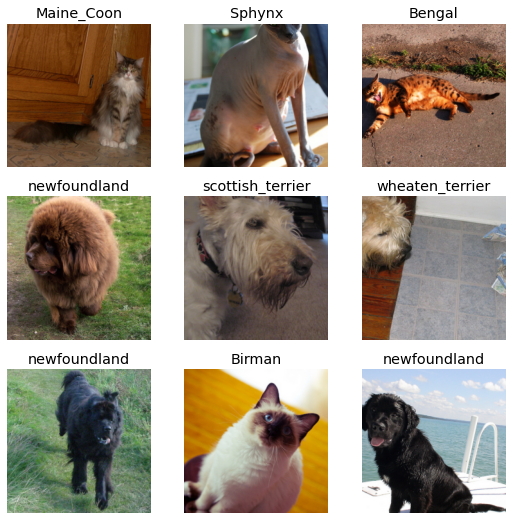

In [10]:
# Check DataBlock
dls.show_batch()

We can check our data blocks with the `summary` method. The example below is missing the resizing of the images and is picked up at the `summary` method.

In [11]:
# Check batches using the summary method
failed_pet = DataBlock(blocks=(ImageBlock,CategoryBlock),
                       get_items=get_image_files,
                       splitter=RandomSplitter(seed=42),
                       get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'),'name'))
failed_pet.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_147.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_147.jpg
    applying partial gives
      Maine_Coon
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(6))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item

RuntimeError: ignored

In [12]:
# Train model to check baselines and test data
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.498044,0.378717,0.118403,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.524486,0.334165,0.105548,01:25
1,0.333446,0.246414,0.081191,01:24


# Cross entropy

In [13]:
# Review dls batches passed on to model
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [14]:
y

TensorCategory([23, 35, 22,  9, 32, 24, 26,  0, 21,  4,  5, 19, 36, 33, 15, 31, 24,  7, 22,  6, 33, 34, 19, 22,  2, 33, 34, 10, 35, 30, 17, 33,  7,  7, 14, 16, 28, 35,  7, 11, 27, 32, 24, 19, 10, 30,
                28, 13,  5, 14, 17, 17,  5,  5, 31, 29, 19, 12, 34, 36, 26,  1,  8, 21], device='cuda:0')

Each batch passes 64 images on 3 channels and 64 labels, one for each image.

In [15]:
# View the predictions (last layer activations)
preds, targs = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([2.0554e-08, 1.6371e-07, 1.9965e-06, 3.0747e-08, 2.0137e-07, 3.8826e-07, 5.0187e-06, 6.7204e-05, 1.5683e-06, 1.7292e-09, 3.8887e-08, 8.9712e-07, 4.7585e-06, 3.4549e-08, 9.3260e-08,
            4.0831e-08, 2.9089e-08, 1.8923e-07, 1.8061e-07, 4.0186e-07, 9.9514e-09, 7.1346e-06, 3.3863e-07, 9.9990e-01, 2.2769e-08, 4.0345e-07, 2.5329e-09, 2.9041e-07, 1.2227e-06, 1.1433e-06,
            6.6646e-06, 5.4074e-08, 2.4376e-08, 2.3170e-08, 5.9422e-10, 1.1848e-08, 3.7997e-07])

In [16]:
preds.shape, targs.shape

(torch.Size([64, 37]), torch.Size([64]))

In [17]:
preds[0].sum()

TensorBase(1.)

Predictions will add up to 1 as they are passed through a Softmax activation layer at the end to boudn them between 0 and 1